In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.markers import MarkerStyle
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,roc_auc_score

(1) QUESTIONS

In [2]:
Confp  = [0.95, 0.85, 0.8, 0.7, 0.55, 0.45, 0.4, 0.3, 0.2, 0.1]
CClass = [1, 1, 0, 1, 1, 0, 1, 1, 0, 0]
#len(Confp)==len(CClass)
q15 = pd.DataFrame({'conf+ve':Confp, 'Class_correct':CClass})  
q15

,conf+ve,Class_correct
0,0.95,1
1,0.85,1
2,0.80,0
3,0.70,1
4,0.55,1
5,0.45,0
6,0.40,1
7,0.30,1
8,0.20,0
9,0.10,0


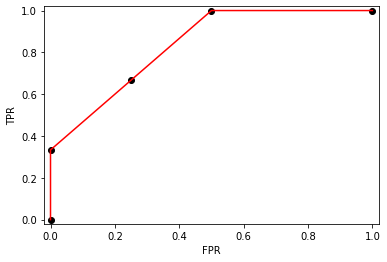

In [3]:
#calculations done by hand
fpr = [0, 0, 1/4, 1/2, 1]
tpr = [0, 1/3, 2/3, 1, 1]
plt.xlim(-0.02,1.02)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim(-0.02,1.02)
plt.scatter(fpr, tpr, color='black')
plt.plot(fpr, tpr, color='red')
plt.savefig("/content/drive/MyDrive/CS760/data3/ROC.pdf")

(2) PROGRAMMING

(1) D2z

In [4]:
#data
D2z = pd.read_csv('/content/drive/MyDrive/CS760/data3/D2z.txt', 
                  header=None, delimiter=" ")
D2z

,0,1,2
0,-0.333338,-0.087171,0
1,-1.531730,0.358194,1
2,1.549590,-0.364050,0
3,-1.349910,0.252063,1
4,1.283850,-0.531146,0
...,...,...,...
195,-0.697750,1.098280,1
196,1.161160,-0.733751,0
197,-1.288480,0.443773,1
198,-1.384200,0.526523,1


In [5]:
#define the grid
x0 = np.linspace(-2, 2, 41)
x1 = np.linspace(-2, 2, 41)
x0_test, x1_test = np.meshgrid(x0, x1, indexing='ij')

d2z_test = np.vstack([x0_test.ravel(), x1_test.ravel()]).T

#define the test dataset
#d2z_test


<ipython-input-6-c60b6225b90d>:9: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(D2z[D2z[2]==1][0],D2z[D2z[2]==1][1],marker='+',facecolors='k',edgecolors='k',s=50,label='Class 1')


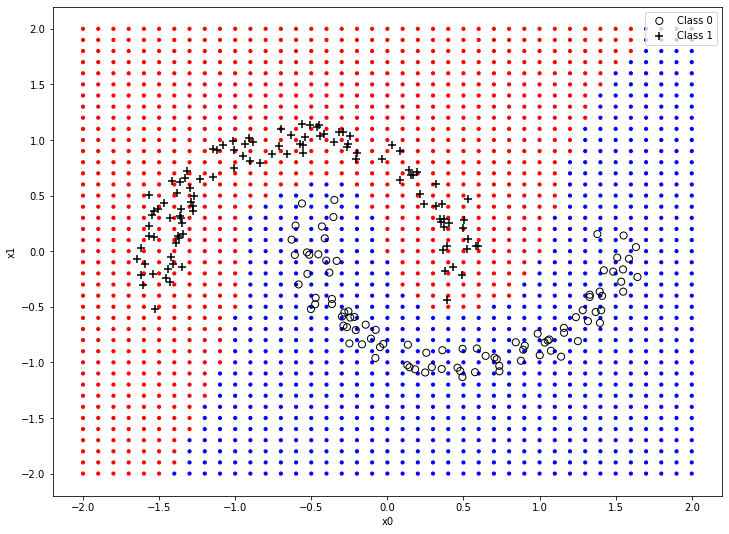

In [6]:
knn_d2z = KNeighborsClassifier()

knn_d2z.fit(D2z.values[:, :-1], D2z.values[:, -1])

preds_d2z = knn_d2z.predict(d2z_test)
plt.figure(figsize=(12,9))
plt.scatter(x0_test, x1_test, c=preds_d2z, cmap='bwr', s=10)
plt.scatter(D2z[D2z[2]==0][0],D2z[D2z[2]==0][1],marker='o',facecolors='none',
            edgecolors='k',s=50,label='Class 0')
plt.scatter(D2z[D2z[2]==1][0],D2z[D2z[2]==1][1],marker='+',facecolors='k',
            edgecolors='k',s=50,label='Class 1')
plt.legend()
plt.xlabel('x0')
plt.ylabel('x1')
plt.savefig("/content/drive/MyDrive/CS760/data3/2-1.pdf")

(2) emails.csv 1-NN

In [7]:
emails = pd.read_csv("/content/drive/MyDrive/CS760/data3/emails.csv",
                     index_col='Email No.')
emails

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
Email 3,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
Email 4,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
Email 5,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Email 4996,20,6,3,1,1,1,34,0,0,15,...,0,0,0,0,0,0,0,1,0,0
Email 4997,0,7,1,0,0,0,20,1,1,0,...,0,0,0,1,0,0,0,0,0,0
Email 4998,6,8,1,3,2,1,64,7,1,16,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Cross validation
fold=[]
for i in [0,1000,2000,3000,4000]:
  fold.append([i, i+1000])

print(fold)
e_accuracy=[]
e_precision=[]
e_recall=[]
for i, (start, end) in enumerate(fold):
    # get training and testing data for fold
    X_train = np.concatenate([emails.values[:,:-1][:start], 
                              emails.values[:,:-1][end:]])
    y_train = np.concatenate([emails.values[:,-1][:start], 
                              emails.values[:,-1][end:]])
    X_test = emails.values[:,:-1][start:end]
    y_test = emails.values[:,-1][start:end]

    # 1NN classifier
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(X_train, y_train)

    e_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))
    e_precision.append(precision_score(y_test, clf.predict(X_test)))
    e_recall.append(recall_score(y_test, clf.predict(X_test)))
print(e_accuracy, e_precision, e_recall)

[[0, 1000], [1000, 2000], [2000, 3000], [3000, 4000], [4000, 5000]]
[0.825, 0.853, 0.862, 0.851, 0.775] [0.6544943820224719, 0.6857142857142857, 0.7212121212121212, 0.7164179104477612, 0.6057441253263708] [0.8175438596491228, 0.8664259927797834, 0.8380281690140845, 0.8163265306122449, 0.7581699346405228]


(3) Logistic Regression

In [36]:
class LogisticRegression:
    
    def __init__(self, lr=0.01, n_iter=1000, tol=1e-4):
        self.lr = lr
        self.n_iter = n_iter
        self.tol = tol
    
    def fit(self, X, y):
        # initialize thetas
        self.thetas = np.zeros(X.shape[1])
        
        # gradient descent
        for i in range(self.n_iter):
            z = np.dot(X, self.thetas)
            y_pred = self.sigmoid(z)
            gradient = np.dot(X.T, (y_pred - y))
            self.thetas -= self.lr * gradient
            
            # convergence using gradient tolerance
            if np.abs(gradient).max() < self.tol:
                print(f"Converged in {i} iterations.")
                break
    
    def predict(self, X):
        z = np.dot(X, self.thetas)
        y_pred = self.sigmoid(z)
        return np.round(y_pred)

    def predict_proba(self, X):
        z = np.dot(X, self.thetas)
        y_pred_proba = self.sigmoid(z)
        return y_pred_proba

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


In [32]:
# logr_25 = LogisticRegression(lr = 0.01, n_iter=1000)
# logr_25.fit(X1_train, y1_train)

<ipython-input-31-4bdf30b12040>:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [35]:
# pred_logr = logr_25.predict_proba(X1_test)

In [72]:
#Cross validation
print(fold)
learning_rates = [0.000001]#0.0001, 0.001, 0.1, 1]
avg_accuracy23, avg_precision23, avg_recall23 = [], [], []

for l in learning_rates:
      clf_logr = LogisticRegression(lr=l)
      accuracy, precision, recall = [], [], []
      print(l)
      for i, (start, end) in enumerate(fold):
        X_train = np.concatenate([emails.values[:,:-1][:start], 
                                  emails.values[:,:-1][end:]])
        y_train = np.concatenate([emails.values[:,-1][:start], 
                                  emails.values[:,-1][end:]])
        X_test = emails.values[:,:-1][start:end]
        y_test = emails.values[:,-1][start:end]

        clf_logr.fit(X_train, y_train)

        accuracy.append(accuracy_score(y_test, clf_logr.predict(X_test)))
        precision.append(precision_score(y_test, clf_logr.predict(X_test)))
        recall.append(recall_score(y_test, clf_logr.predict(X_test)))

      print(accuracy)
      print(precision)
      print(recall)

#print(avg_accuracy23, avg_precision23, avg_recall23)

[[0, 1000], [1000, 2000], [2000, 3000], [3000, 4000], [4000, 5000]]
1e-06


<ipython-input-36-4bdf30b12040>:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-36-4bdf30b12040>:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-36-4bdf30b12040>:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-36-4bdf30b12040>:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-36-4bdf30b12040>:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


[0.905, 0.893, 0.767, 0.891, 0.862]
[0.8598484848484849, 0.83203125, 0.5562913907284768, 0.8013029315960912, 0.8088235294117647]
[0.7964912280701755, 0.7689530685920578, 0.8873239436619719, 0.8367346938775511, 0.7189542483660131]


In [45]:
print(avg_accuracy23, avg_precision23, avg_recall23)

[[0.8620000000000001], [0.8818000000000001]] [[0.8193711882842962], [0.7911093628389825]] [[0.6857505634858743], [0.8225780084606832]]


(4) Cross Validation on k

In [39]:
#Cross validation on k
k_vals = [1,3,5,7,10]
avg_accuracy24 = []
for k in k_vals:
      clf = KNeighborsClassifier(n_neighbors=k)
      accuracy = []
      for i, (start, end) in enumerate(fold):
        X_train = np.concatenate([emails.values[:,:-1][:start], 
                                  emails.values[:,:-1][end:]])
        y_train = np.concatenate([emails.values[:,-1][:start], 
                                  emails.values[:,-1][end:]])
        X_test = emails.values[:,:-1][start:end]
        y_test = emails.values[:,-1][start:end]

        clf.fit(X_train, y_train)

        accuracy.append(accuracy_score(y_test, clf.predict(X_test)))
      
      avg_accuracy24.append([sum(accuracy)/len(accuracy)])
avg_accuracy24

[[0.8332], [0.8422000000000001], [0.8408], [0.8462], [0.8556000000000001]]

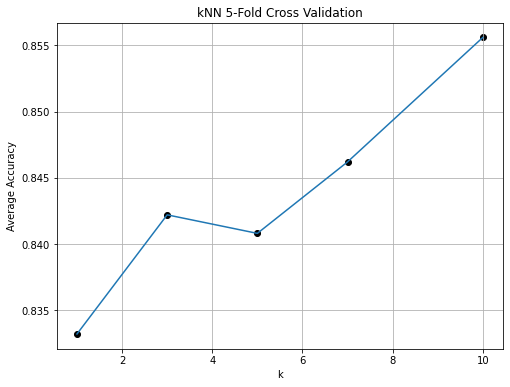

In [40]:
plt.figure(figsize=(8,6))
plt.plot(k_vals, avg_accuracy24)
plt.scatter(k_vals, avg_accuracy24, c='black')
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.title('kNN 5-Fold Cross Validation')
plt.grid()
plt.savefig("/content/drive/MyDrive/CS760/data3/2-4.pdf")

In [12]:
#single train-test
X1_train=emails.values[:,:-1][0:4000]
y1_train=emails.values[:,-1][0:4000]
X1_test=emails.values[:,:-1][4000:5000]
y1_test=emails.values[:,-1][4000:5000]

In [13]:
knn_25 = KNeighborsClassifier(n_neighbors=5)
knn_25.fit(X1_train, y1_train)
pred_knn = knn_25.predict_proba(X1_test).T[1]

In [48]:
logr_253 = LogisticRegression(lr = 0.01, n_iter=1000)
logr_253.fit(X1_train, y1_train)
pred_logr3 = logr_253.predict_proba(X1_test)

logr_252 = LogisticRegression(lr = 0.001, n_iter=1000)
logr_252.fit(X1_train, y1_train)
pred_logr2 = logr_252.predict_proba(X1_test)

logr_251 = LogisticRegression(lr = 0.0001, n_iter=1000)
logr_251.fit(X1_train, y1_train)
pred_logr1 = logr_251.predict_proba(X1_test)

logr_25 = LogisticRegression(lr = 0.00001, n_iter=1000)
logr_25.fit(X1_train, y1_train)
pred_logr = logr_25.predict_proba(X1_test)

<ipython-input-36-4bdf30b12040>:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


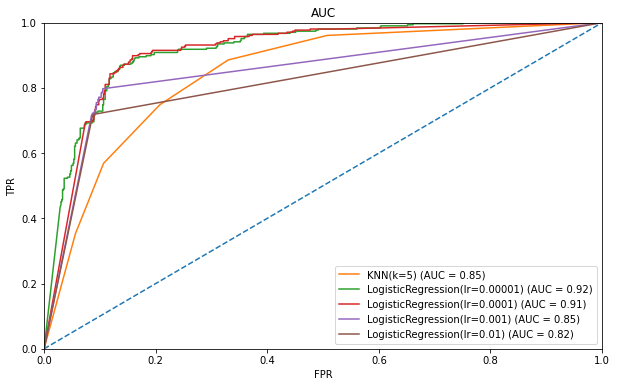

In [51]:
#Get the FPR, TPR
fpr_knn, tpr_knn, thresh_knn = roc_curve(y1_test, pred_knn)
fpr_logr3, tpr_logr3, thresh_logr3 = roc_curve(y1_test, pred_logr3)
fpr_logr2, tpr_logr2, thresh_logr2 = roc_curve(y1_test, pred_logr2)
fpr_logr1, tpr_logr1, thresh_logr1 = roc_curve(y1_test, pred_logr1)
fpr_logr, tpr_logr, thresh_logr = roc_curve(y1_test, pred_logr)

#Determine the AUC
roc_auc_knn= roc_auc_score(y1_test, pred_knn)
roc_auc_logr= roc_auc_score(y1_test, pred_logr)
roc_auc_logr1= roc_auc_score(y1_test, pred_logr1)
roc_auc_logr2= roc_auc_score(y1_test, pred_logr2)
roc_auc_logr3= roc_auc_score(y1_test, pred_logr3)

#Plot ROC
fig_ROC = plt.figure(figsize=(10, 6))

plt.plot([0, 1], [0, 1], linestyle='--') #model that guesses

plt.plot(fpr_knn, tpr_knn, label='KNN(k=5) (AUC = %0.2f)' % roc_auc_knn) 
plt.plot(fpr_logr, tpr_logr, 
         label='LogisticRegression(lr=0.00001) (AUC = %0.2f)' % roc_auc_logr) 
plt.plot(fpr_logr1, tpr_logr1, 
         label='LogisticRegression(lr=0.0001) (AUC = %0.2f)' % roc_auc_logr1)
plt.plot(fpr_logr2, tpr_logr2, 
         label='LogisticRegression(lr=0.001) (AUC = %0.2f)' % roc_auc_logr2)
plt.plot(fpr_logr3, tpr_logr3, 
         label='LogisticRegression(lr=0.01) (AUC = %0.2f)' % roc_auc_logr3) 

plt.legend()

plt.xlim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylim([0.0, 1.0])
plt.ylabel('TPR')
#pred_logr
plt.title('AUC')
plt.savefig("/content/drive/MyDrive/CS760/data3/2-51.pdf")

In [ ]:
rocs = {}
for l in [0.001, 0.0001, 0.00001, 0.000001, 0.0000001]:
  logr = LogisticRegression(lr = l, n_iter=1000)
  logr.fit(X1_train, y1_train)
  pred = logr.predict_proba(X1_test)
  rocs[l] = roc_auc_score(y1_test, pred)


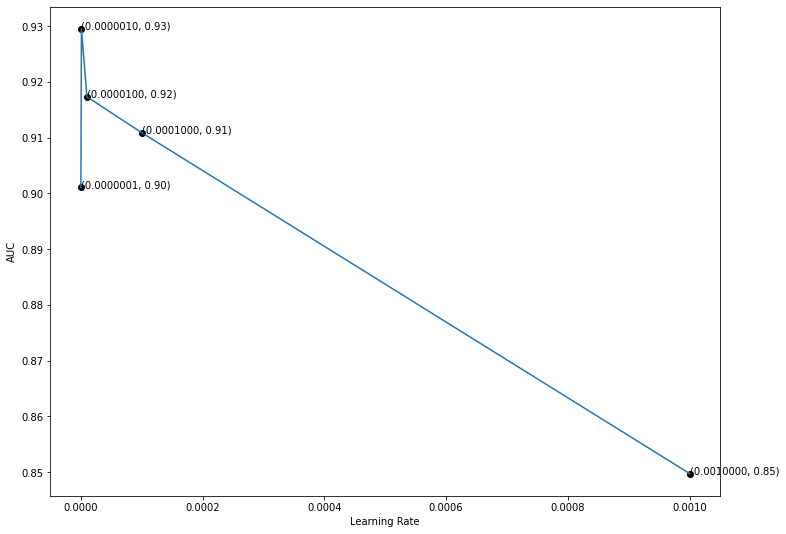

In [70]:
lists = sorted(rocs.items())
a, b = zip(*lists)
plt.figure(figsize=(12,9))
plt.scatter(a,b,c='black')
plt.plot(a,b)
plt.xlabel('Learning Rate')
plt.ylabel('AUC')
for xy in zip(a, b):
   plt.annotate('(%.7f, %.2f)' % xy, xy=xy)
plt.savefig("/content/drive/MyDrive/CS760/data3/2-52.pdf")

(5) 

<ipython-input-36-4bdf30b12040>:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


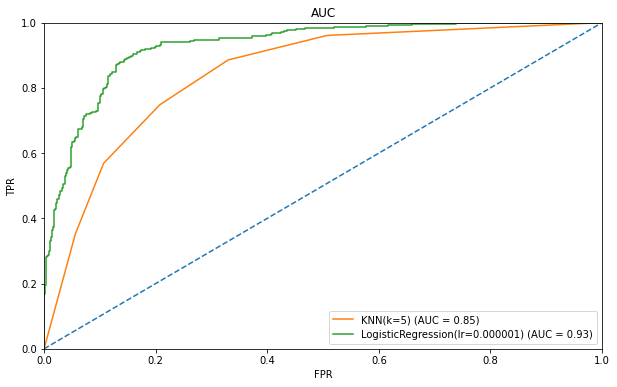

In [71]:
logrf = LogisticRegression(lr = 0.000001, n_iter=1000)
logrf.fit(X1_train, y1_train)
pred_logrf = logrf.predict_proba(X1_test)

fpr_logrf, tpr_logrf, thresh_logrf = roc_curve(y1_test, pred_logrf)
roc_auc_logrf= roc_auc_score(y1_test, pred_logrf)

#Plot ROC
fig_ROCf = plt.figure(figsize=(10, 6))

plt.plot([0, 1], [0, 1], linestyle='--') #model that guesses

plt.plot(fpr_knn, tpr_knn, label='KNN(k=5) (AUC = %0.2f)' % roc_auc_knn) 
plt.plot(fpr_logrf, tpr_logrf, 
         label='LogisticRegression(lr=0.000001) (AUC = %0.2f)' % roc_auc_logrf) 

plt.legend()

plt.xlim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylim([0.0, 1.0])
plt.ylabel('TPR')
#pred_logr
plt.title('AUC')
plt.savefig("/content/drive/MyDrive/CS760/data3/2-5.pdf")